# Machine Learning:
## Decision Tree Algorithm.
- __Decision Tree Algorithm.__ Using Classification.

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

## Load Dataset:

In [141]:
titanic = sns.load_dataset("titanic")

In [142]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [143]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [144]:
titanic.describe

<bound method NDFrame.describe of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult

In [145]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [146]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [147]:
features = ["pclass", "sex", "fare", "embarked", "age"]
target = ["survived"]

In [148]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Handeling Missing Data:

In [149]:
imp_median = SimpleImputer(strategy = "median")
titanic[["age"]] = imp_median.fit_transform(titanic[["age"]])

imp_freq = SimpleImputer(strategy = "most_frequent")
titanic[["embarked"]] = imp_freq.fit_transform(titanic[["embarked"]])

In [150]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [151]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [152]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [153]:
titanic.shape

(891, 15)

# Data Encoding:

In [154]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [155]:
label_encoder = LabelEncoder()
titanic["sex"] = label_encoder.fit_transform(titanic["sex"])
titanic["embarked"] = label_encoder.fit_transform(titanic["embarked"])

## Train, Test and Split:

In [156]:
X = titanic[features]
y = titanic[target]

In [157]:
X.head()

,pclass,sex,fare,embarked,age
0,3,1,7.2500,2,22.0
1,1,0,71.2833,0,38.0
2,3,0,7.9250,2,26.0
3,1,0,53.1000,2,35.0
4,3,1,8.0500,2,35.0


In [158]:
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [159]:
X_train, X_test, y_train, y_test = train_test_split (
    X, y,
    test_size = 0.3,
    random_state = 42
)

In [160]:
X_train.head()

,pclass,sex,fare,embarked,age
445,1,1,81.8583,2,4.0
650,3,1,7.8958,2,28.0
172,3,0,11.1333,2,1.0
450,2,1,27.7500,2,36.0
314,2,1,26.2500,2,43.0


## Decision Tree Model:

In [161]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [162]:
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)}")

Model Accuracy: 0.75


## Tree Structure of Data:

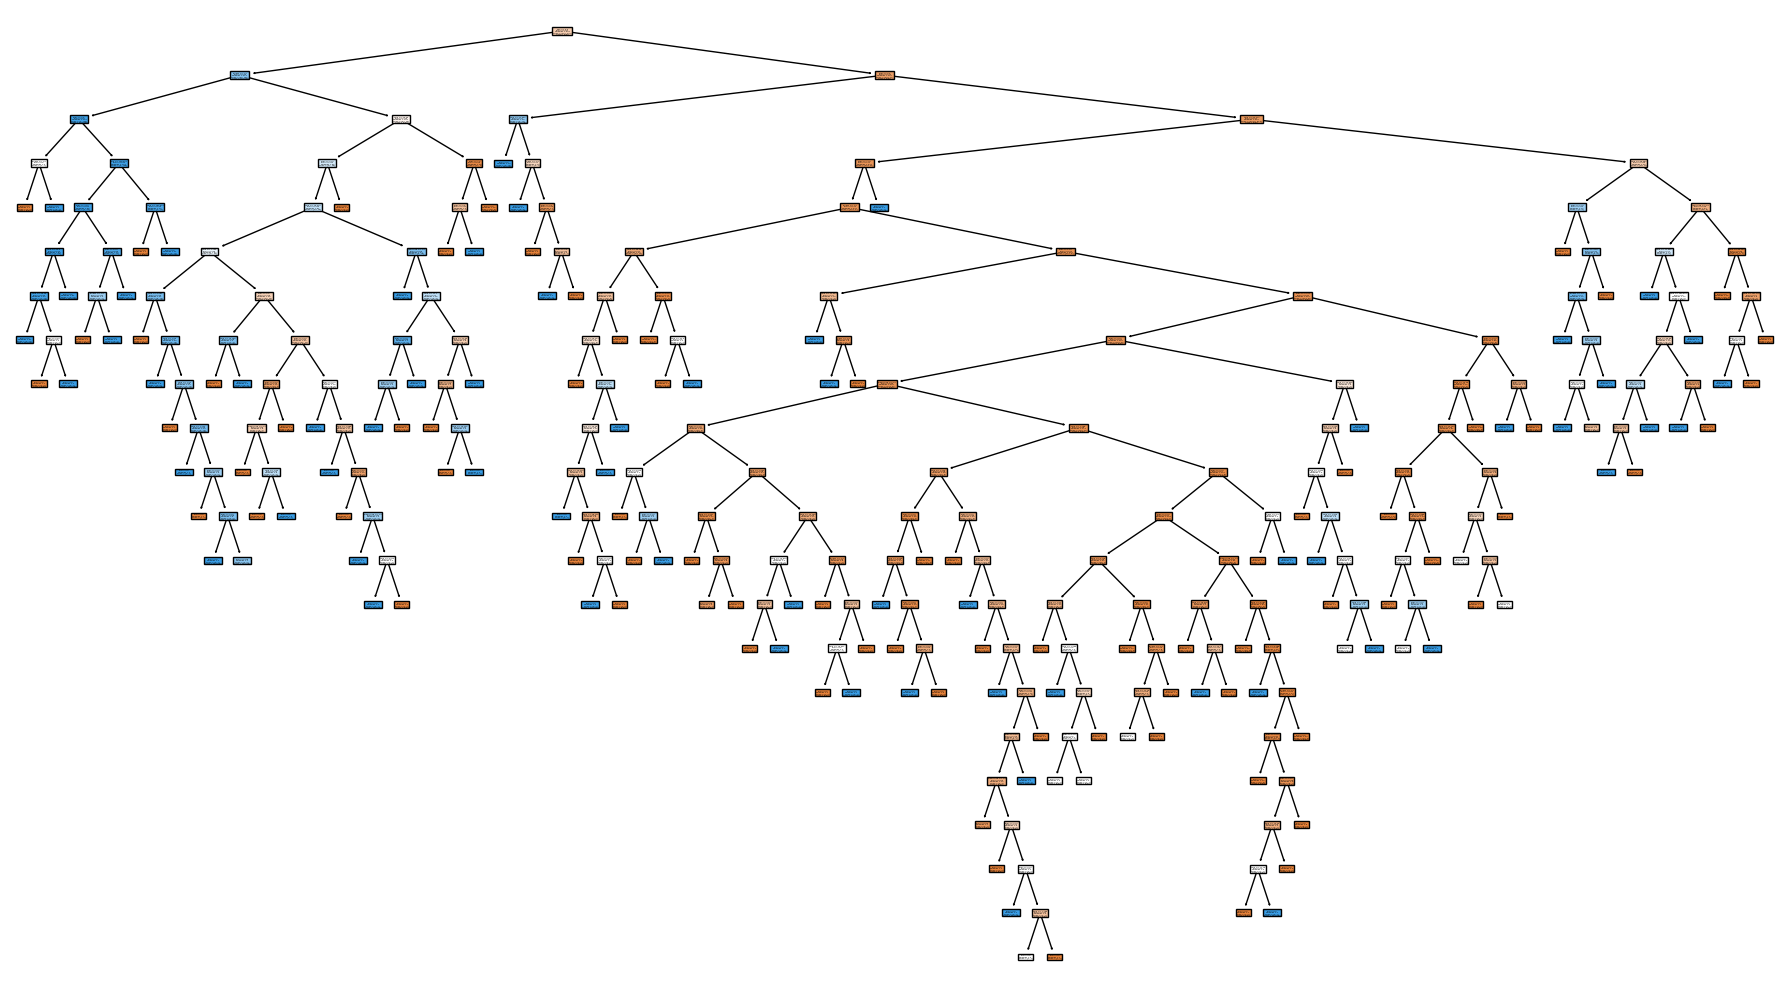

In [163]:
plt.figure(
    figsize=(18, 10)
)

plot_tree(
    model,
    feature_names = X.columns,
    class_names = ["Died" ,"Survived"],
    filled = True
)

plt.tight_layout()
plt.show()

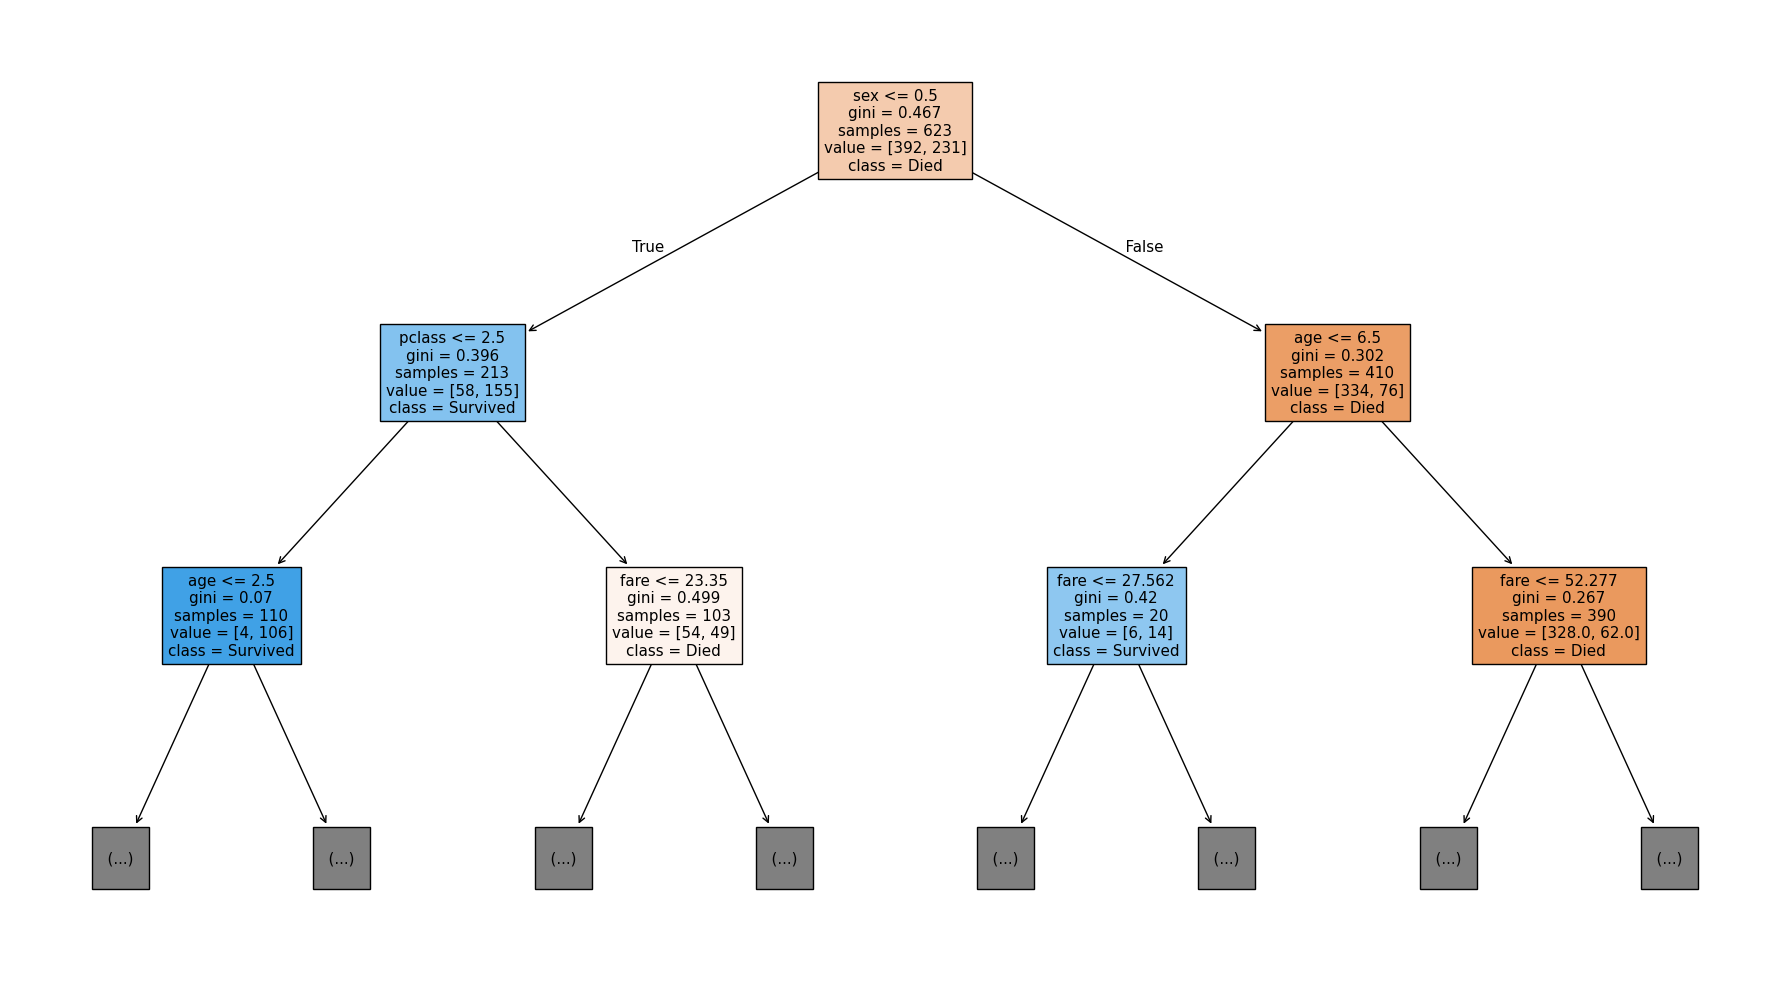

In [164]:
plt.figure(
    figsize=(18, 10)
)

plot_tree(
    model,
    feature_names = X.columns,
    class_names = ["Died" ,"Survived"],
    filled = True,
    max_depth = 2
)

plt.tight_layout()
plt.show()

In [165]:
X.head()

,pclass,sex,fare,embarked,age
0,3,1,7.2500,2,22.0
1,1,0,71.2833,0,38.0
2,3,0,7.9250,2,26.0
3,1,0,53.1000,2,35.0
4,3,1,8.0500,2,35.0


In [166]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True


## Decision Tree with Pre-Pruning:

For depth 2, accuracy: 0.7723880597014925


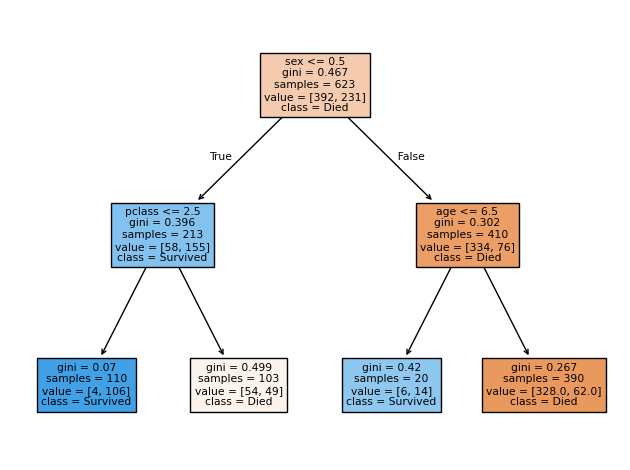

For depth 3, accuracy: 0.8059701492537313


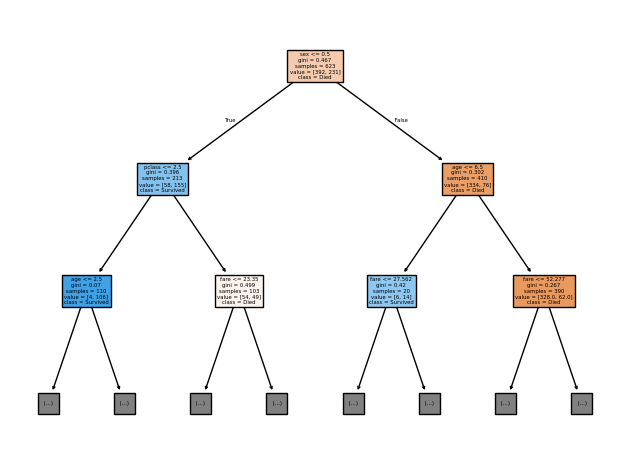

For depth 4, accuracy: 0.8246268656716418


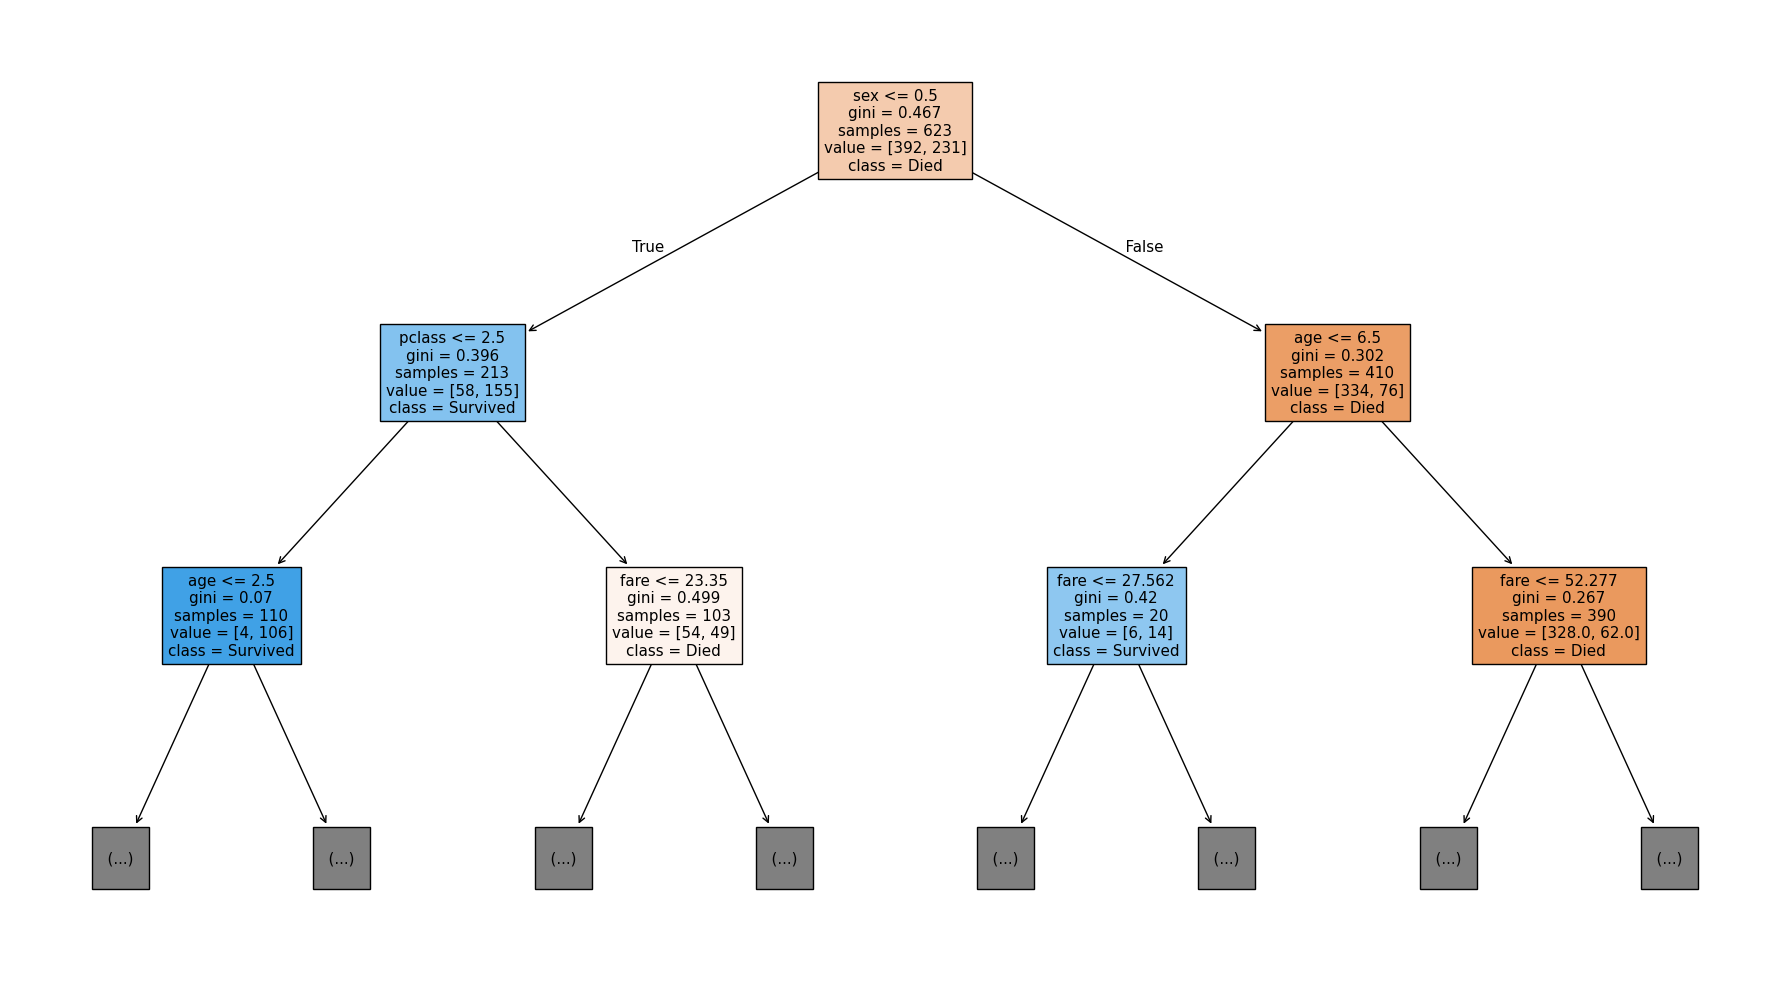

For depth 5, accuracy: 0.7947761194029851


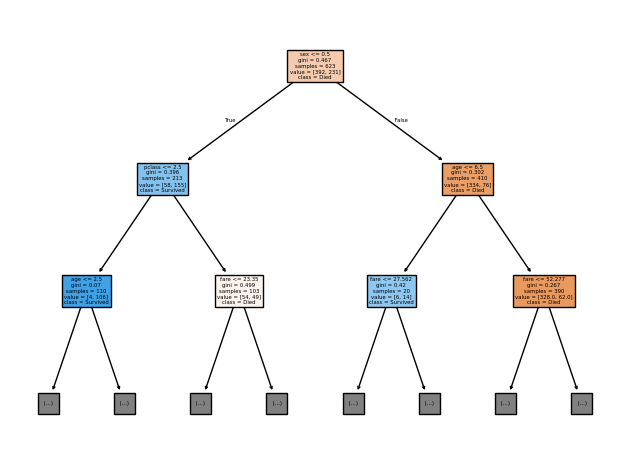

For depth 6, accuracy: 0.7873134328358209


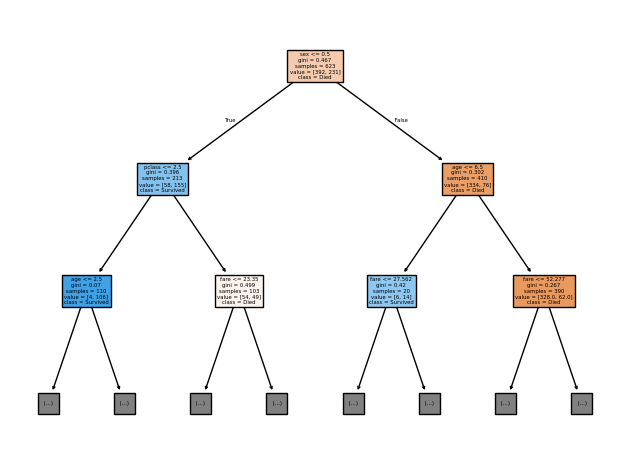

For depth 7, accuracy: 0.7761194029850746


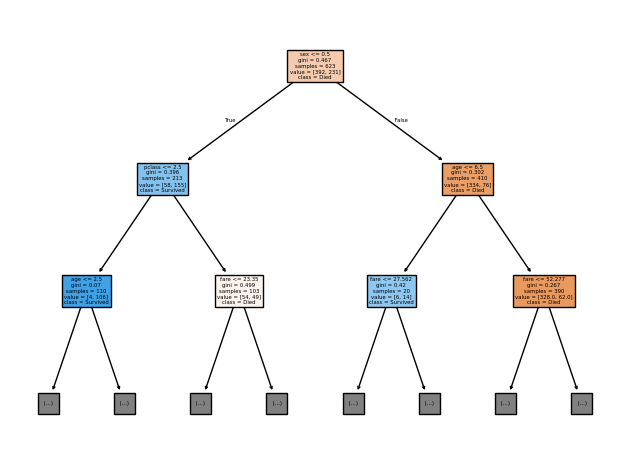

For depth 8, accuracy: 0.8059701492537313


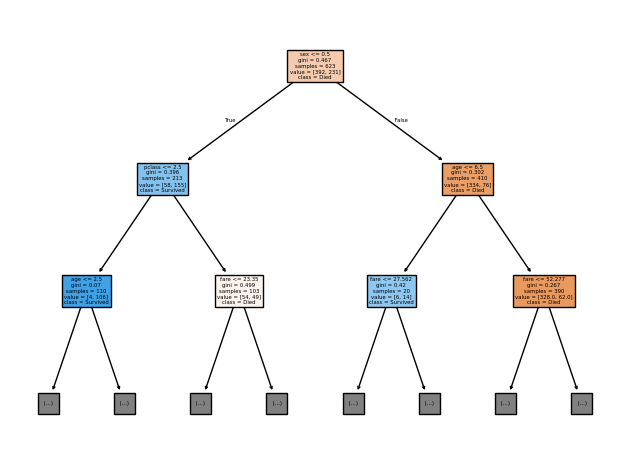

For depth 9, accuracy: 0.7686567164179104


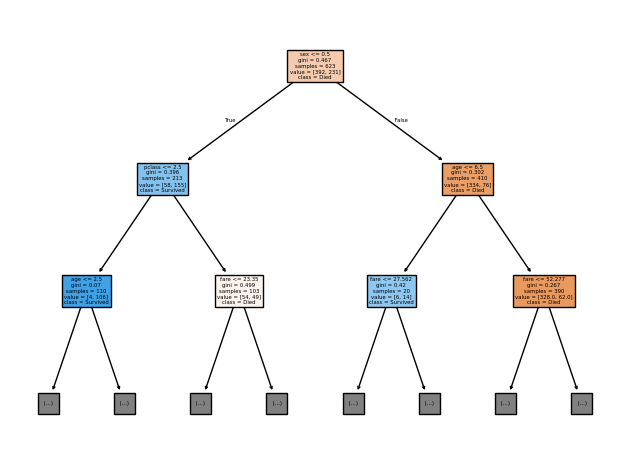

For depth 10, accuracy: 0.7873134328358209


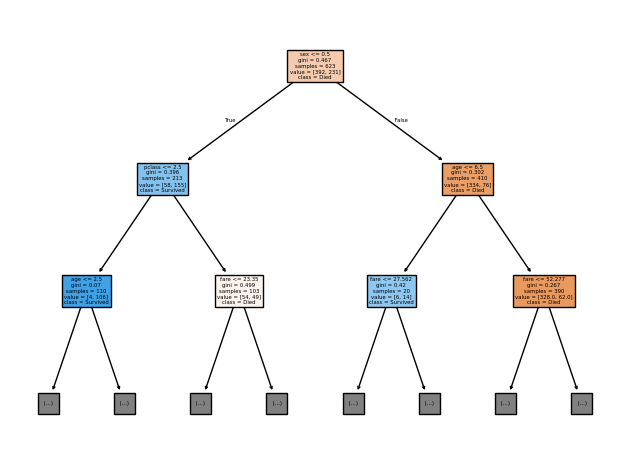

In [167]:
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"For depth {depth}, accuracy: {acc}")

    if depth == 4:
        plt.figure(
        figsize=(18, 10)
    )
    
    plot_tree(
        model,
        feature_names = X.columns,
        class_names = ["Died" ,"Survived"],
        filled = True,
        max_depth = 2
    )
    
    plt.tight_layout()
    plt.show()

For depth 2, accuracy: 0.7723880597014925


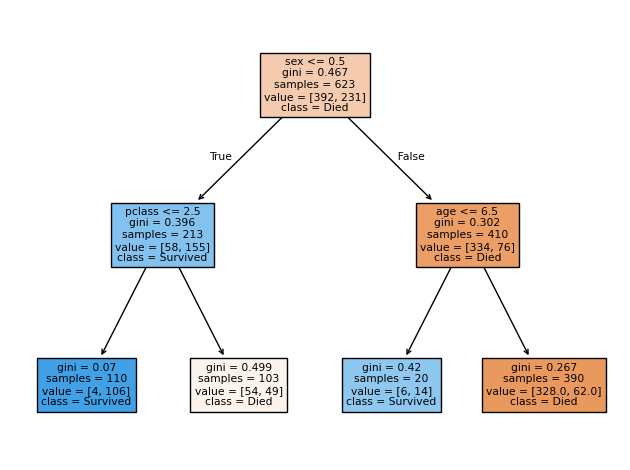

For depth 3, accuracy: 0.8059701492537313


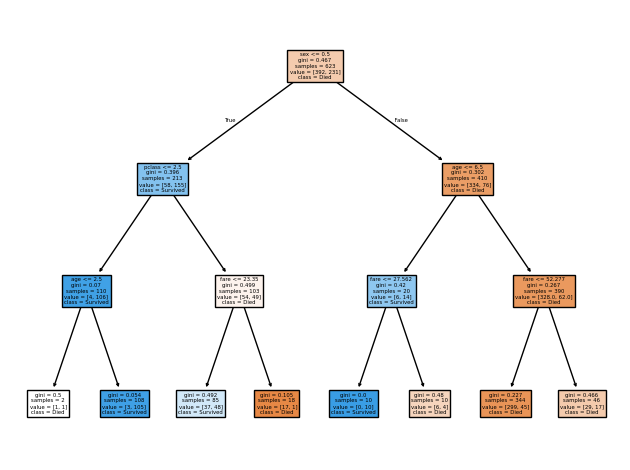

For depth 4, accuracy: 0.8246268656716418


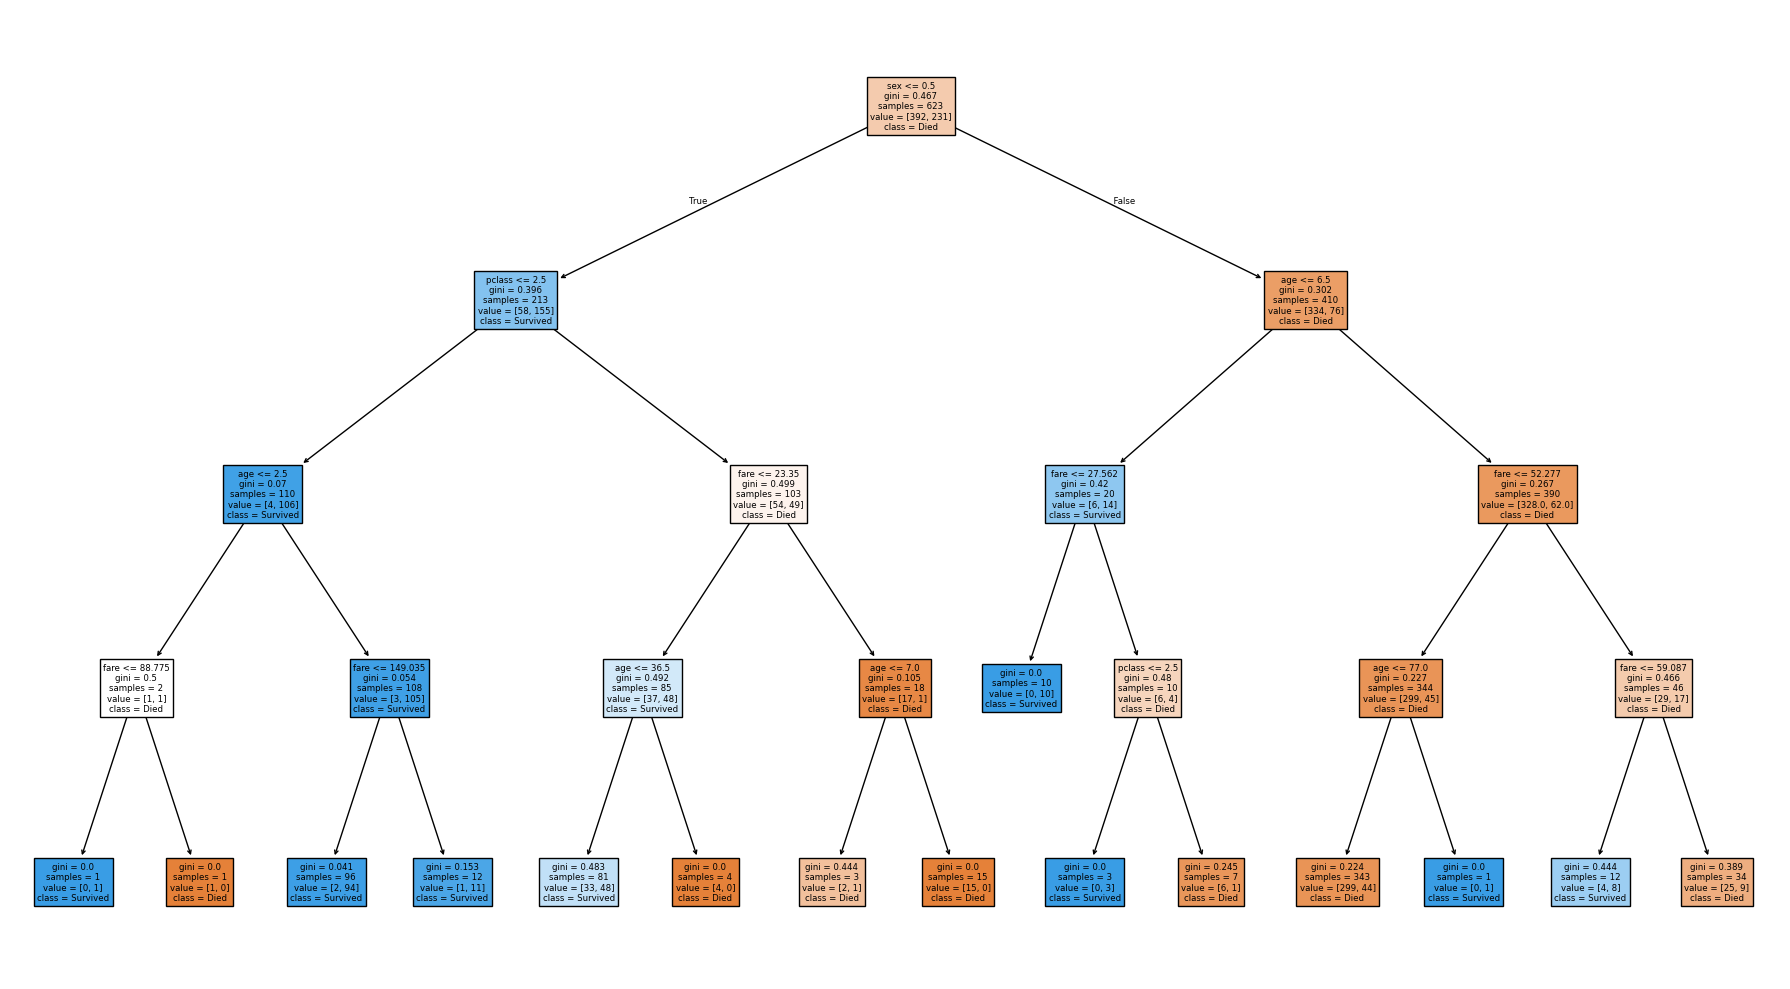

For depth 5, accuracy: 0.7985074626865671


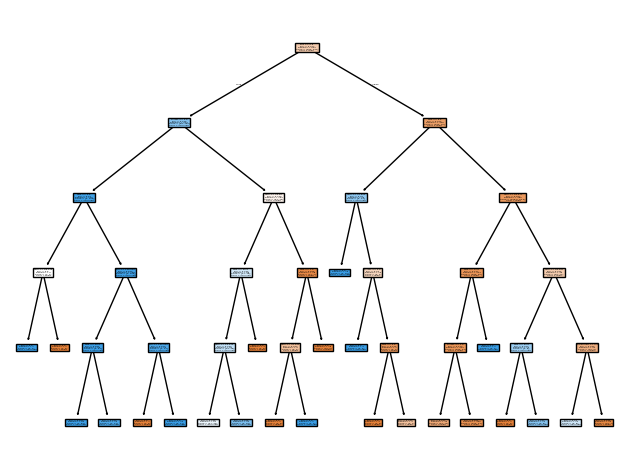

For depth 6, accuracy: 0.7873134328358209


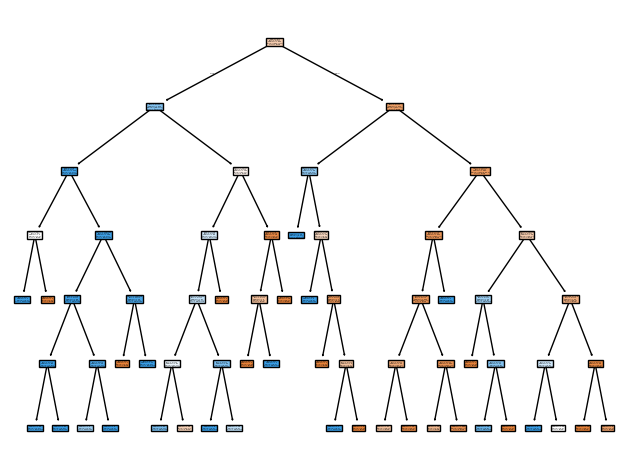

For depth 7, accuracy: 0.7835820895522388


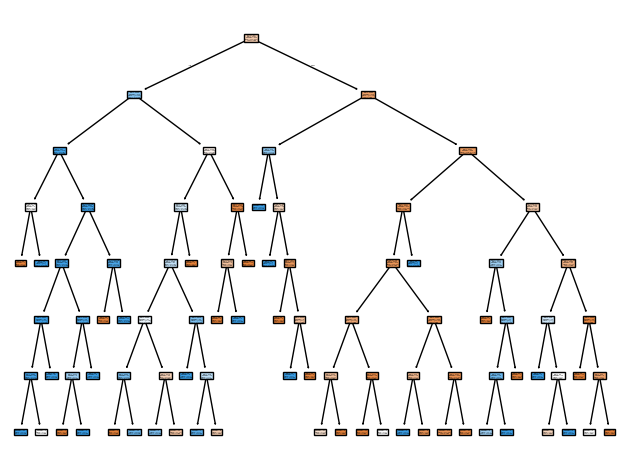

For depth 8, accuracy: 0.8022388059701493


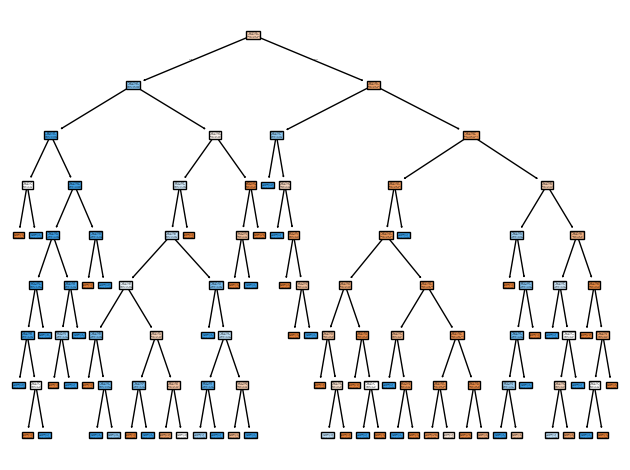

For depth 9, accuracy: 0.7723880597014925


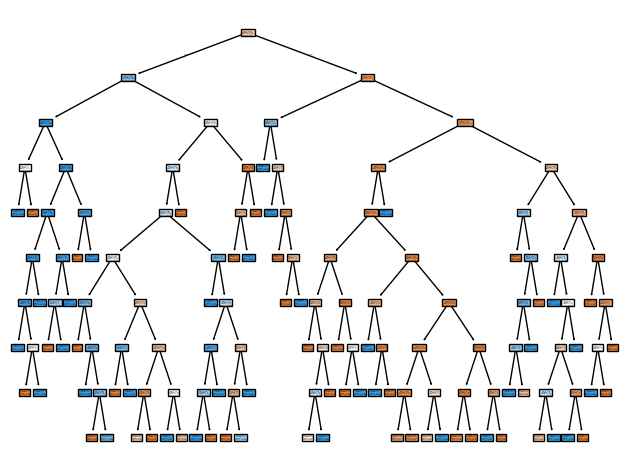

For depth 10, accuracy: 0.7910447761194029


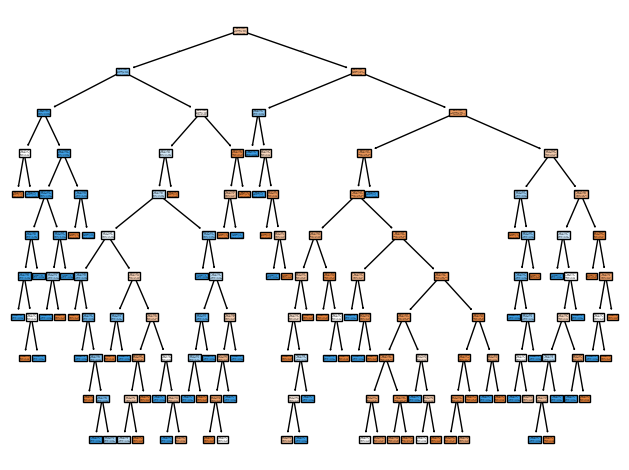

In [168]:
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"For depth {depth}, accuracy: {acc}")

    if depth == 4:
        plt.figure(
        figsize=(18, 10)
    )
    
    plot_tree(
        model,
        feature_names = X.columns,
        class_names = ["Died" ,"Survived"],
        filled = True,
    )
    
    plt.tight_layout()
    plt.show()

In [169]:
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
min_samples_split = [10, 15, 20, 25, 30]

for split in min_sample_split:
    model = DecisionTreeClassifier(max_depth = 4, min_samples_split = 10)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"For min sample split {split}, accuracy: {acc}")

For min sample split 10, accuracy: 0.8246268656716418
For min sample split 15, accuracy: 0.8246268656716418
For min sample split 20, accuracy: 0.8246268656716418
For min sample split 25, accuracy: 0.8246268656716418
For min sample split 30, accuracy: 0.8246268656716418


For min sample split 10, accuracy: 0.8246268656716418


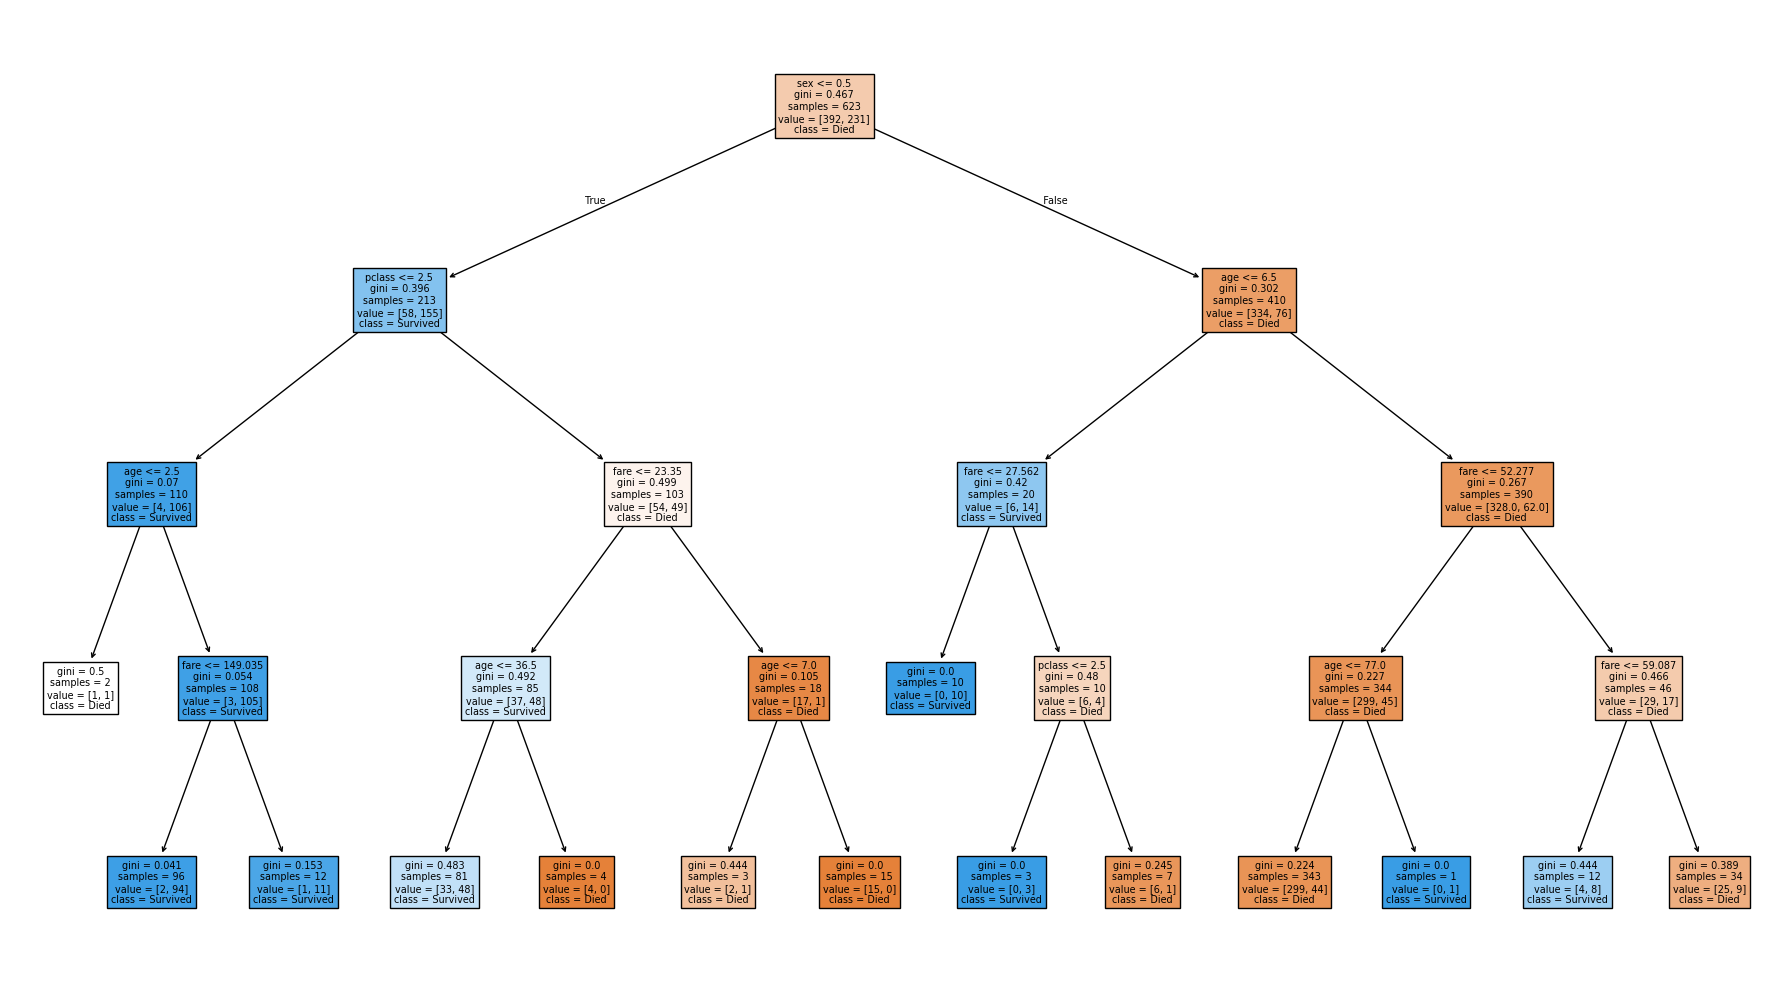

For min sample split 15, accuracy: 0.8246268656716418


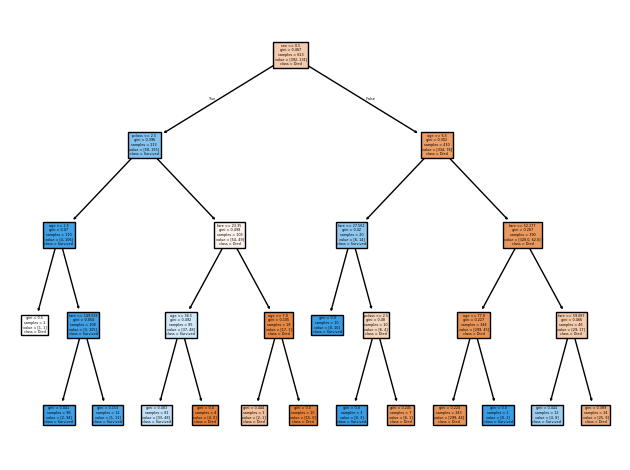

For min sample split 20, accuracy: 0.8246268656716418


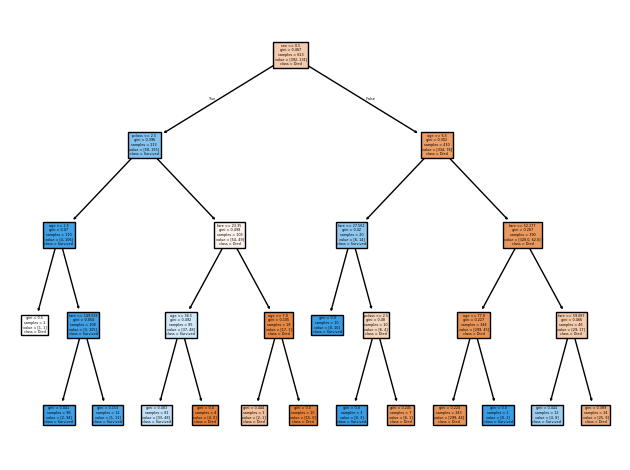

For min sample split 25, accuracy: 0.8246268656716418


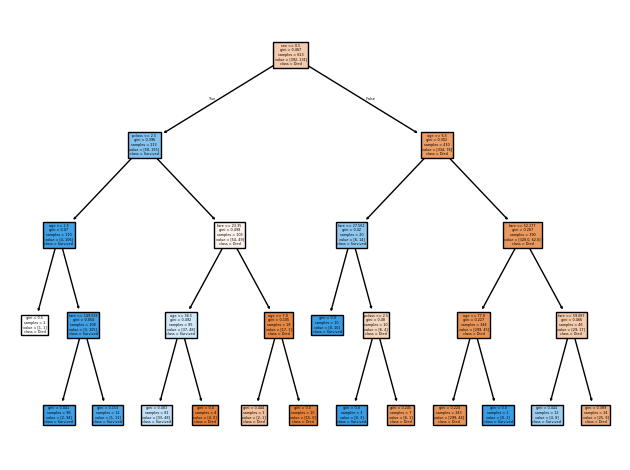

For min sample split 30, accuracy: 0.8246268656716418


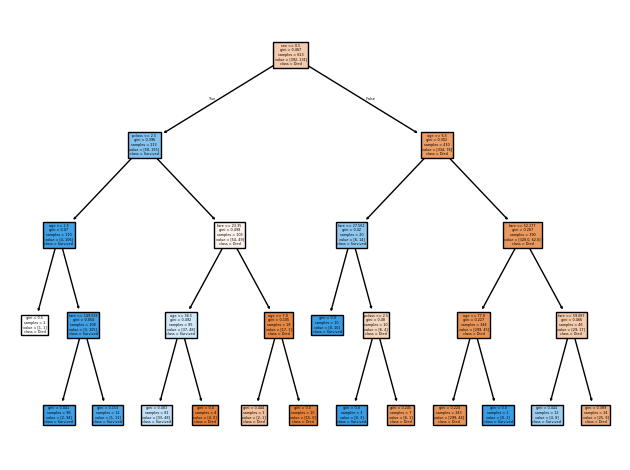

In [170]:
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
min_samples_split = [10, 15, 20, 25, 30]

for split in min_sample_split:
    model = DecisionTreeClassifier(max_depth = 4, min_samples_split = 10)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"For min sample split {split}, accuracy: {acc}")

    if split == 10:
        plt.figure(
        figsize=(18, 10)
    )

    plot_tree(
        model,
        feature_names = X.columns,
        class_names = ["Died" ,"Survived"],
        filled = True,
    )

    plt.tight_layout()
    plt.show()

## Post-Pruning Decision Tree:

In [171]:
full_tree = DecisionTreeClassifier(random_state = 42)
full_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [172]:
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)

[0.         0.         0.00013376 0.00013376 0.00022931 0.00032103
 0.00048409 0.00053505 0.00053505 0.00053505 0.00062746 0.00064205
 0.00077709 0.00085607 0.00093633 0.00096308 0.00096308 0.00096308
 0.00099875 0.00101659 0.00104193 0.0010478  0.00107009 0.00109238
 0.00115927 0.0012352  0.00123729 0.00129646 0.00132211 0.00133563
 0.00137583 0.00137583 0.00139708 0.00143228 0.00144145 0.00150482
 0.00151596 0.00152184 0.00171215 0.00183444 0.0019012  0.00195674
 0.00200642 0.00214018 0.00233474 0.0024077  0.00260835 0.00263292
 0.00278606 0.00280169 0.00284379 0.00288925 0.00299625 0.00302412
 0.00431144 0.00495299 0.00577849 0.00589431 0.0074248  0.01236198
 0.01787674 0.04065074 0.1323581 ]


## Train our Model for all Alphas:

In [176]:
trees = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state = 42, ccp_alpha = alpha)
    model.fit(X_train, y_train)

    trees.append((model, alpha))

In [177]:
best_acc = 0
best_alpha = 0

for model, alpha in trees:
    curr_acc = model.score(X_test, y_test)
    if curr_acc > best_acc:
        best_acc = curr_acc
        best_alpha = alpha

In [178]:
best_alpha

np.float64(0.0017121455323702516)

In [179]:
best_acc

0.8208955223880597

In [189]:
best_model = DecisionTreeClassifier(ccp_alpha = best_alpha)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0017121455323702516))

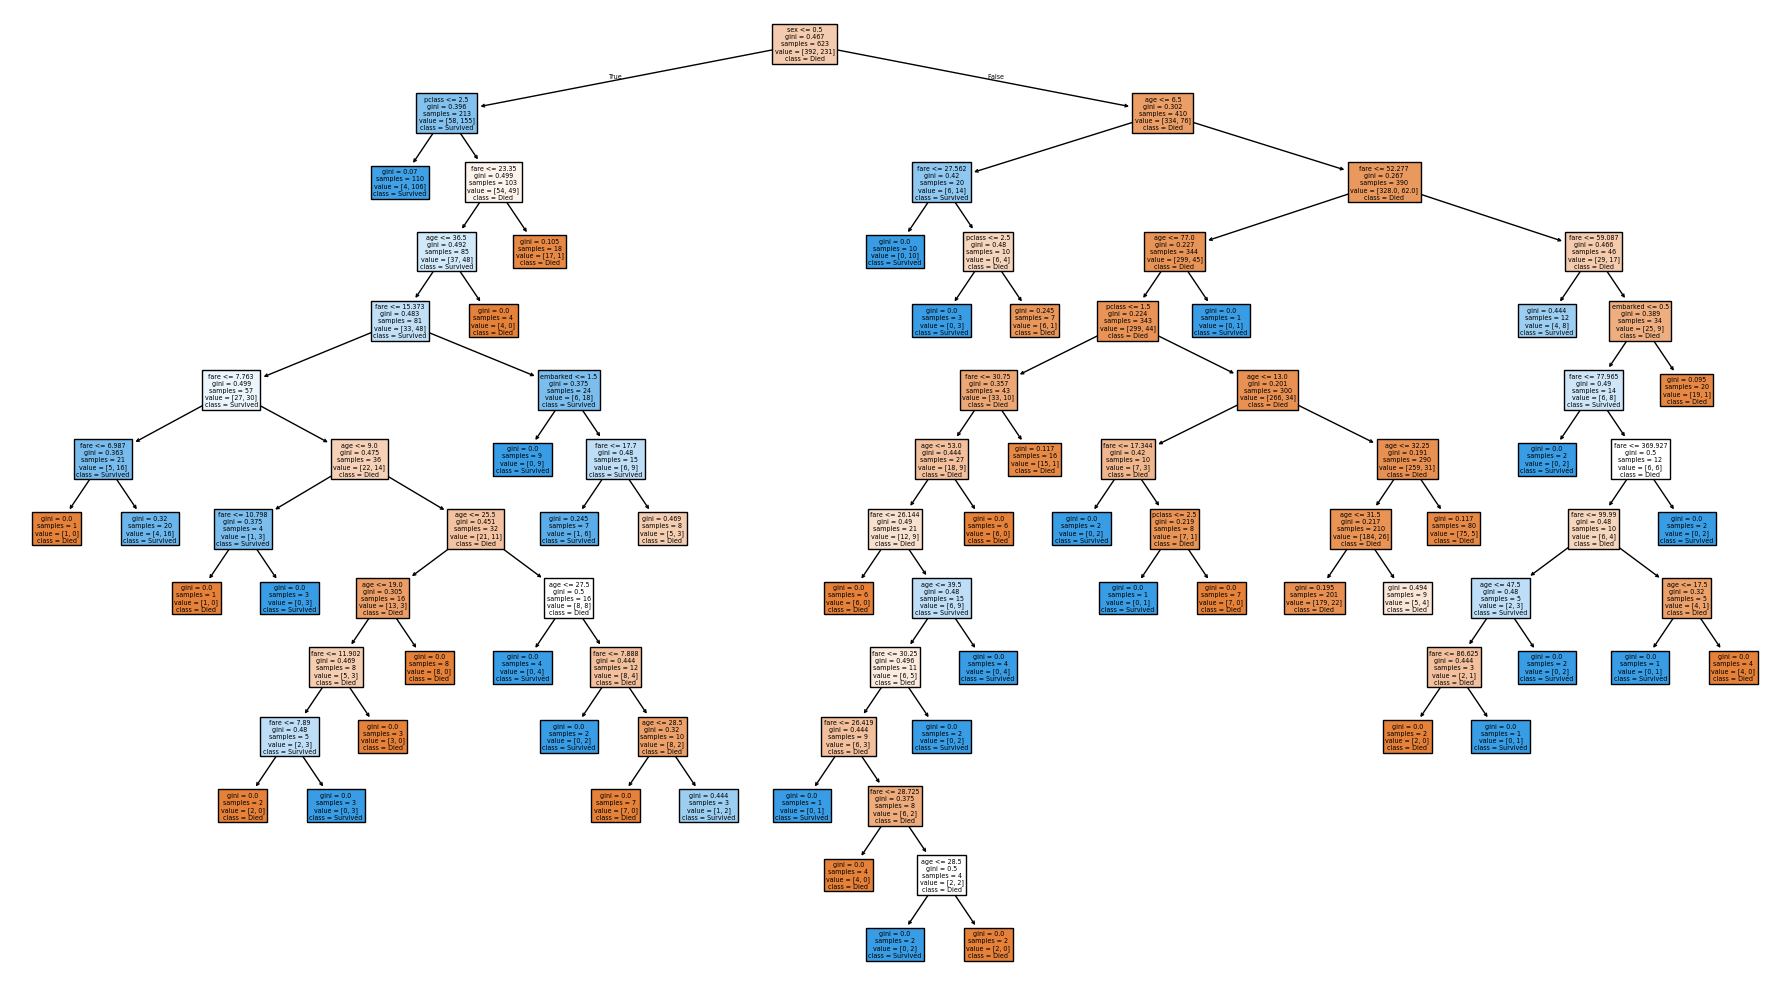

In [191]:
plt.figure(figsize=(18, 10))

plot_tree(
    best_model,
    feature_names = X.columns,
    class_names = ["Died","Survived"],
    filled = True,
)

plt.tight_layout()
plt.show()

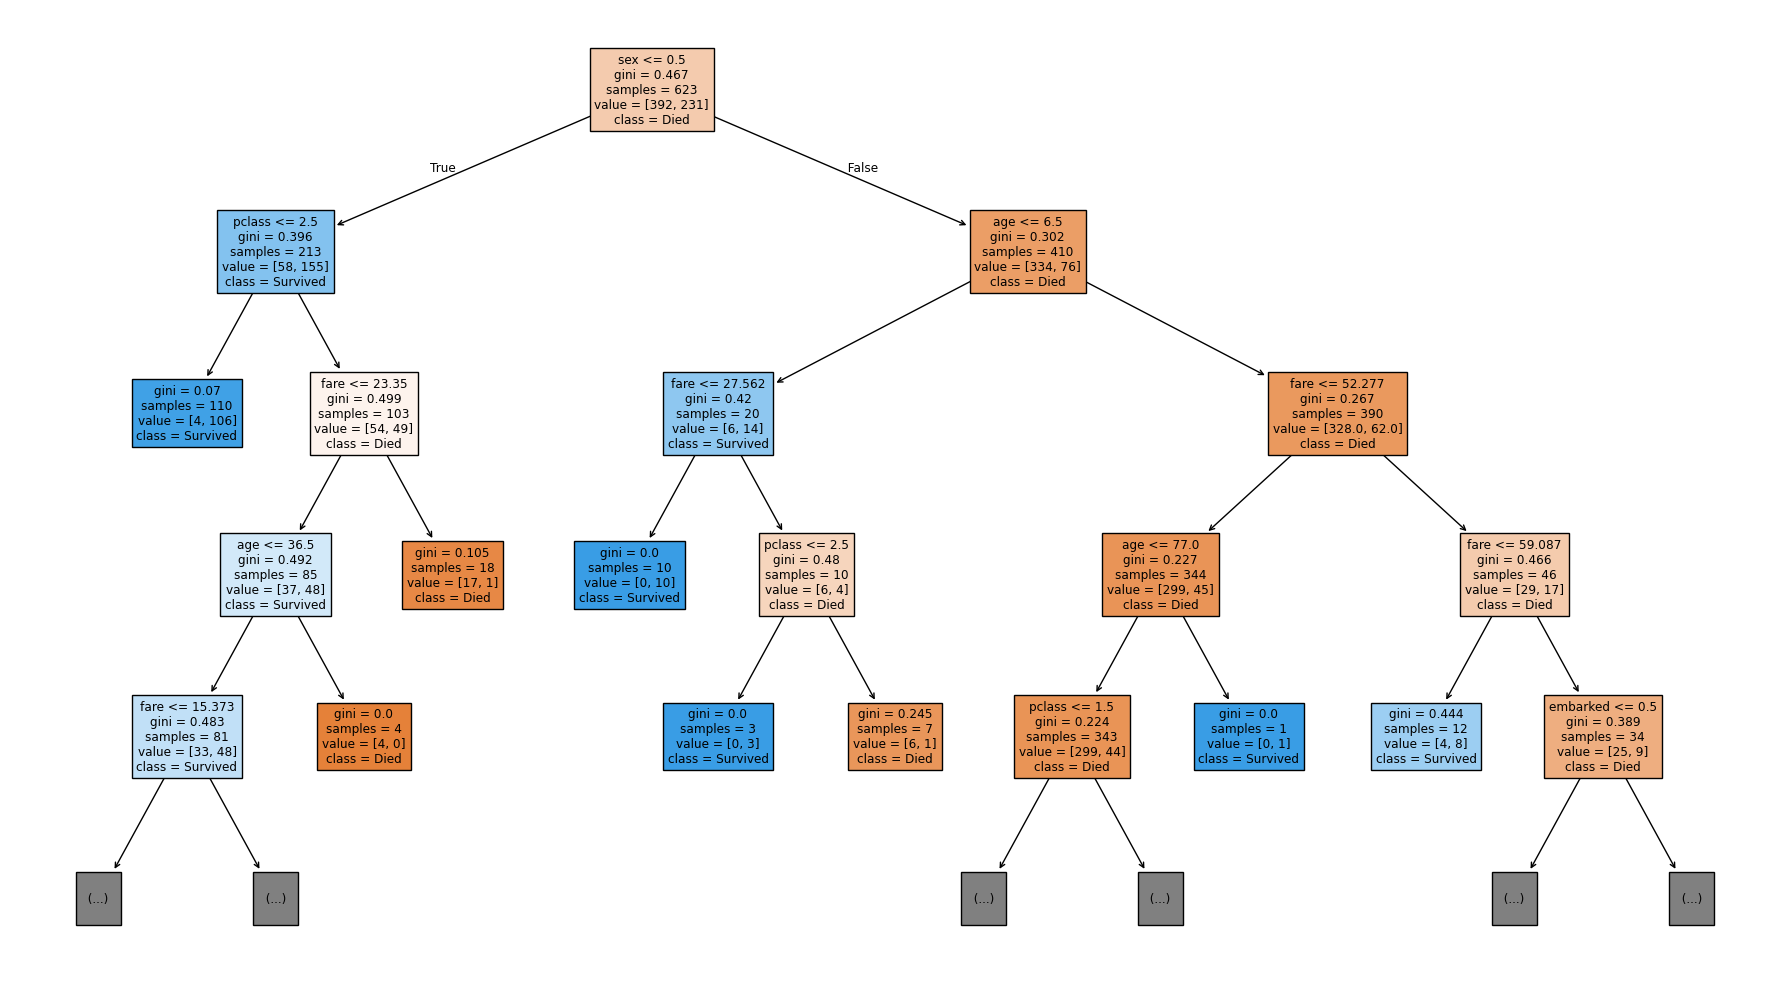

In [194]:
plt.figure(figsize=(18, 10))

plot_tree(
    best_model,
    feature_names = X.columns,
    class_names = ["Died","Survived"],
    filled = True,
    max_depth = 4
)

plt.tight_layout()
plt.show()

In [193]:
print(best_model.score(X_test, y_test))

0.8208955223880597
